In [45]:
# 필요한 package 불러오기

%pylab inline
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# **3. LOF Comparison with IF and OCSVM**

> Isolation Forest

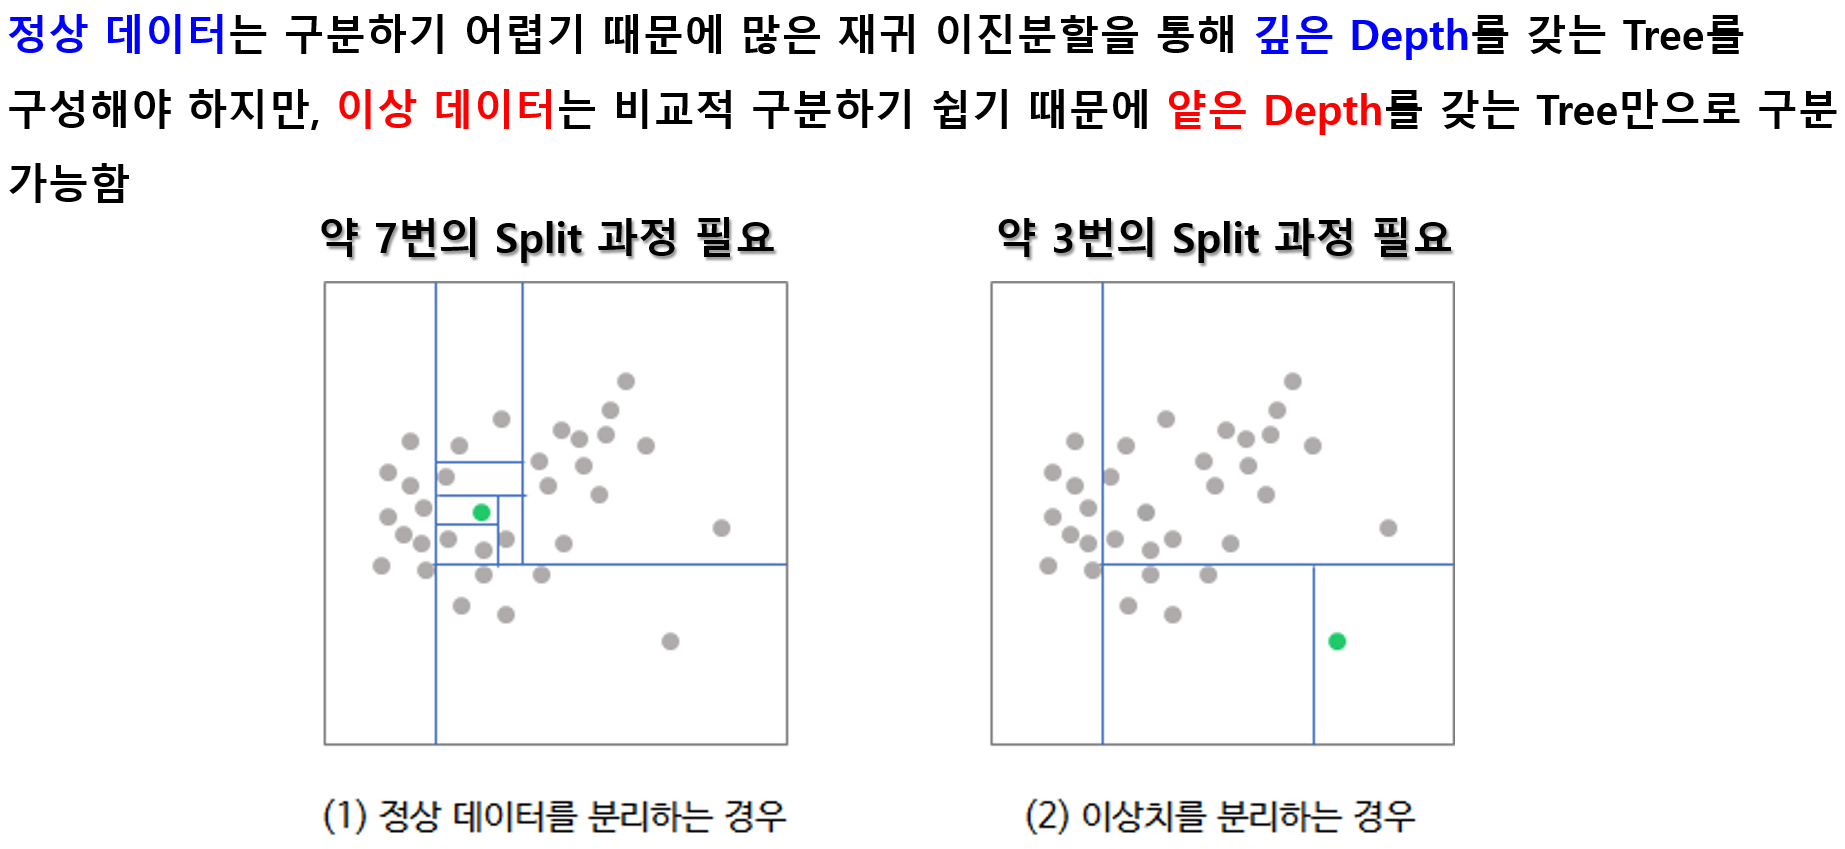

> Support Vector Machine

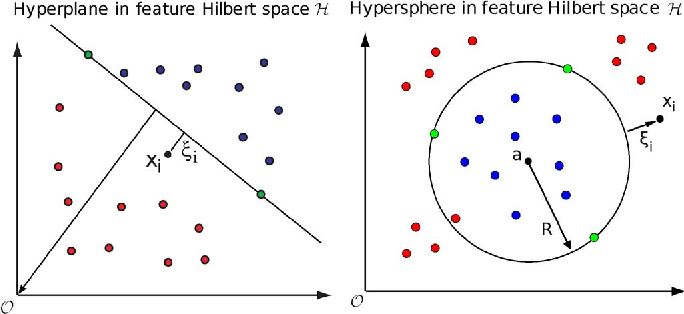

In [46]:
!git clone https://github.com/yun-seon/LGE_DIC_Training_0404.git

fatal: destination path 'LGE_DIC_Training_0404' already exists and is not an empty directory.


In [47]:
# load the dataset

data= pd.read_csv("/content/LGE_DIC_Training_0404/secom.csv")
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [48]:
# droping the first column of the data

data = data.drop(['Time'], axis = 1)
data.shape

(1567, 591)

In [49]:
# filling missing values

data.fillna(0, inplace = True)
print("NA counts: ", data.isnull().sum().sum())

data.head()

NA counts:  0


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [50]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [51]:
data['Pass/Fail'][data['Pass/Fail'] == 1] = 1
data['Pass/Fail'][data['Pass/Fail'] == -1] = 0

data['Pass/Fail'].value_counts()

<ipython-input-51-d25e831d6793>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pass/Fail'][data['Pass/Fail'] == 1] = 1
<ipython-input-51-d25e831d6793>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Pass/Fail'][data['Pass/Fail'] == -1] = 0


0    1463
1     104
Name: Pass/Fail, dtype: int64

In [52]:
# again creating x and y from the dataset
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [53]:
# splittng the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 0)

# print the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1096, 590)
Shape of x_test : (471, 590)
Shape of y_train : (1096,)
Shape of y_test : (471,)


### *Case 1. 이상치 비율을 알고 있는 경우*

In [54]:
# defining outlier fraction

Fraud = data[data['Pass/Fail']==1]
Valid = data[data['Pass/Fail']==0]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.0710868079289132


In [55]:
# fit the model for outlier detection
# use the default value of 20 nearest neighbors to measure the local deviation of the density

'''
LOF parameters (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)
  - n_neighbors: the number of neighbors
  - metric: the metric to use for distance computation (default is minkowski, which results in the standard Euclidean distance when p=2)
  - contamination: the proportion of outliers

IF parameters (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
  - n_neighbors: the number of base estimators in ensemble
  - max_samples: the number of samples to draw from X to train each base estimator
  - contamination: the proportion of outliers
'''

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=50, max_samples=len(x_train),
                                       contamination=outlier_fraction,random_state=0, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=5, algorithm='auto',
                                              leaf_size=30, metric='euclidean',
                                              p=2, metric_params=None, contamination=outlier_fraction)
}

In [56]:
for i, (clf_name,clf) in enumerate(classifiers.items()):

    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_lof = clf.fit_predict(x_test)
        y_pred = y_pred_lof
        scores_prediction = clf.negative_outlier_factor_
    else:
        clf.fit(x_train)
        scores_prediction = clf.decision_function(x_test)
        y_pred_if = clf.predict(x_test)
        y_pred = y_pred_if

    #Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y_test).sum()

    # Run Classification Metrics
    print("\n{}: {}".format(clf_name, n_errors))
    print("Classification Report :")
    print(classification_report(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Isolation Forest: 45
Classification Report :
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       440
           1       0.23      0.19      0.21        31

    accuracy                           0.90       471
   macro avg       0.59      0.57      0.58       471
weighted avg       0.90      0.90      0.90       471


Local Outlier Factor: 61
Classification Report :
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       440
           1       0.06      0.06      0.06        31

    accuracy                           0.87       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.88      0.87      0.87       471



### *Case 2. 정상 데이터만을 수집한 경우*

In [57]:
# normal data filtering for training the models

x_train_normal = x_train.loc[y_train[y_train == 0].index,:]
y_train_normal = y_train[x_train_normal.index]

print("All points: ", x_train.shape, "\nNormal points", x_train_normal.shape)
print("All points: ", y_train.shape, "\nNormal points", y_train_normal.shape)

All points:  (1096, 590) 
Normal points (1023, 590)
All points:  (1096,) 
Normal points (1023,)


#### *(1) LOF algorithm*

In [58]:
'''
LOF parameters (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)
  - n_neighbors: the number of neighbors
  - metric: the metric to use for distance computation (default is minkowski, which results in the standard Euclidean distance when p=2)
  - contamination: the proportion of outliers
'''

# define
clf_lof = LocalOutlierFactor(n_neighbors=5, algorithm='auto',
                                              leaf_size=30, metric='euclidean',
                                              p=2, metric_params=None)
# train
clf_lof.fit(x_train_normal)

# scoring
scores_tr = clf_lof.negative_outlier_factor_

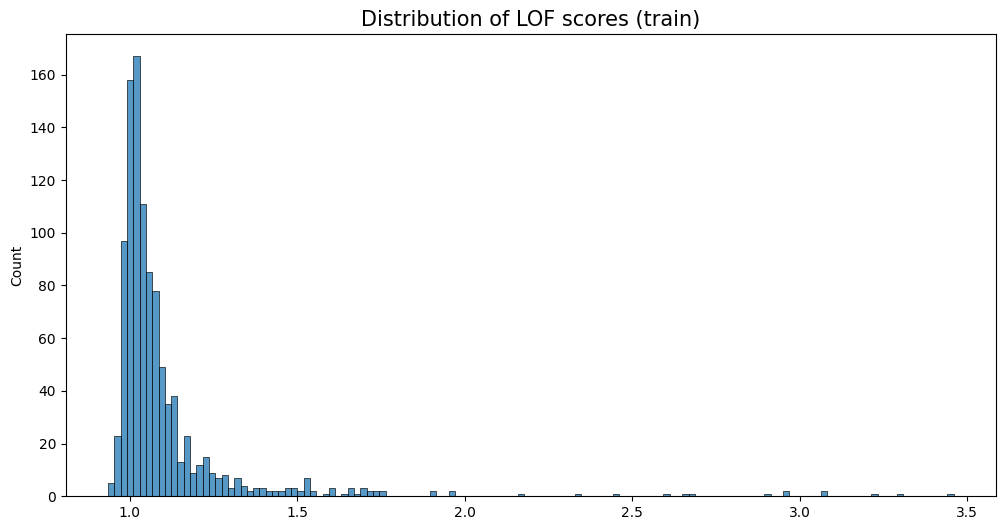

In [59]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_tr))
plt.title('Distribution of LOF scores (train)', fontsize = 15)
plt.show()

threshold (max):  1.24231389213815 threshold (percentile): 1.4656287920339948


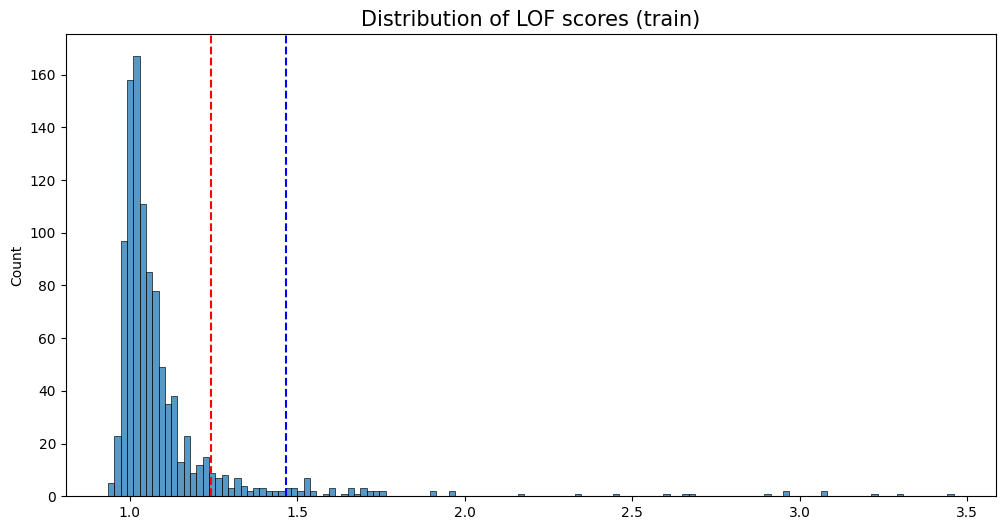

In [60]:
# set the thresholds

# case 1. percentile (10% 허용오차)
thres1 = np.percentile(np.abs(scores_tr), 90)

# case 2. percentile (5% 허용오차)
thres2 = np.percentile(np.abs(scores_tr), 95)

print("threshold (max): ", thres1, "threshold (percentile):", thres2)

# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_tr))
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of LOF scores (train)', fontsize = 15)
plt.show()

In [61]:
# predict lof scores
clf_lof.fit(x_test)
scores_ts = clf_lof.negative_outlier_factor_

# make the results to the dataframe
results = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(np.abs(scores_ts))[0]], axis=1)
results.columns = ['Label', 'LOF Scores']

results['Pred_thres1'] = 0
results['Pred_thres2'] = 0
results.loc[results['LOF Scores'] > thres1, 'Pred_thres1'] = 1
results.loc[results['LOF Scores'] > thres2, 'Pred_thres2'] = 1

results

,Label,LOF Scores,Pred_thres1,Pred_thres2
0,0,1.068591,0,0
1,0,1.023780,0,0
2,0,1.006787,0,0
3,0,1.008963,0,0
4,0,1.059523,0,0
...,...,...,...,...
466,1,1.041801,0,0
467,0,1.046747,0,0
468,0,1.372835,1,0
469,0,1.003167,0,0


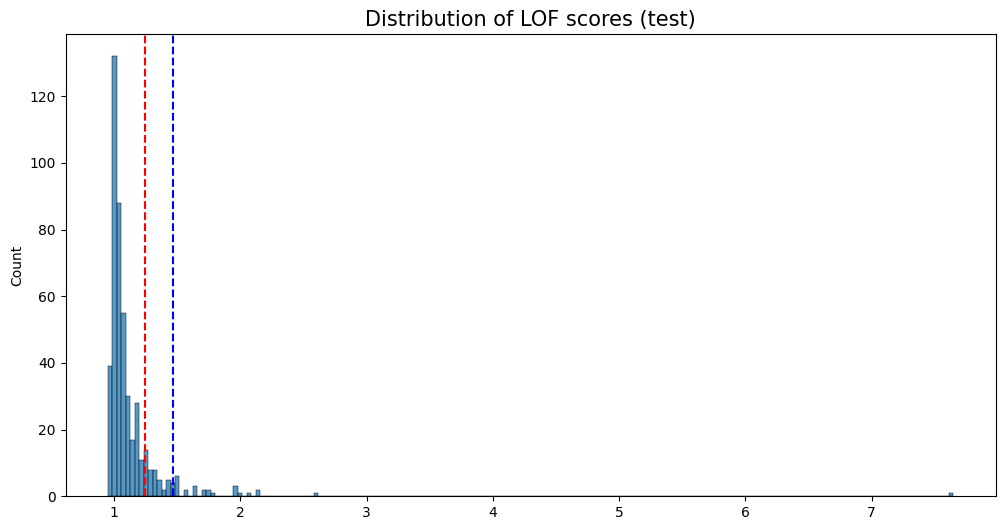

In [62]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_ts))
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of LOF scores (test)', fontsize = 15)
plt.show()

In [63]:
results.Label.value_counts()

0    440
1     31
Name: Label, dtype: int64

In [64]:
results.Pred_thres1.value_counts() # use a threshold 1

0    402
1     69
Name: Pred_thres1, dtype: int64

In [65]:
results.Pred_thres2.value_counts() # use a threshold 2

0    445
1     26
Name: Pred_thres2, dtype: int64

In [66]:
print("Classification Report (threshold 1) :")
print(classification_report(results.Label.values, results.Pred_thres1.values))

Classification Report (threshold 1) :
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       440
           1       0.03      0.06      0.04        31

    accuracy                           0.80       471
   macro avg       0.48      0.46      0.46       471
weighted avg       0.87      0.80      0.83       471



In [67]:
print("Classification Report (threshold 2) :")
print(classification_report(results.Label.values, results.Pred_thres2.values))

Classification Report (threshold 2) :
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       440
           1       0.04      0.03      0.04        31

    accuracy                           0.88       471
   macro avg       0.49      0.49      0.49       471
weighted avg       0.87      0.88      0.88       471



#### *(2) IF algorithm*

In [68]:
'''
IF parameters (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html)
  - n_neighbors: the number of base estimators in ensemble
  - max_samples: the number of samples to draw from X to train each base estimator
  - contamination: the proportion of outliers
'''

# define
clf_if = IsolationForest(n_estimators=50, max_samples=len(x_train),
                                       random_state=0, verbose=0)

# train
clf_if.fit(x_train_normal)

# scoring
scores_tr = clf_if.decision_function(x_train_normal)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (1096) is greater than the total number of samples (1023). max_samples will be set to n_samples for estimation.
  warn(


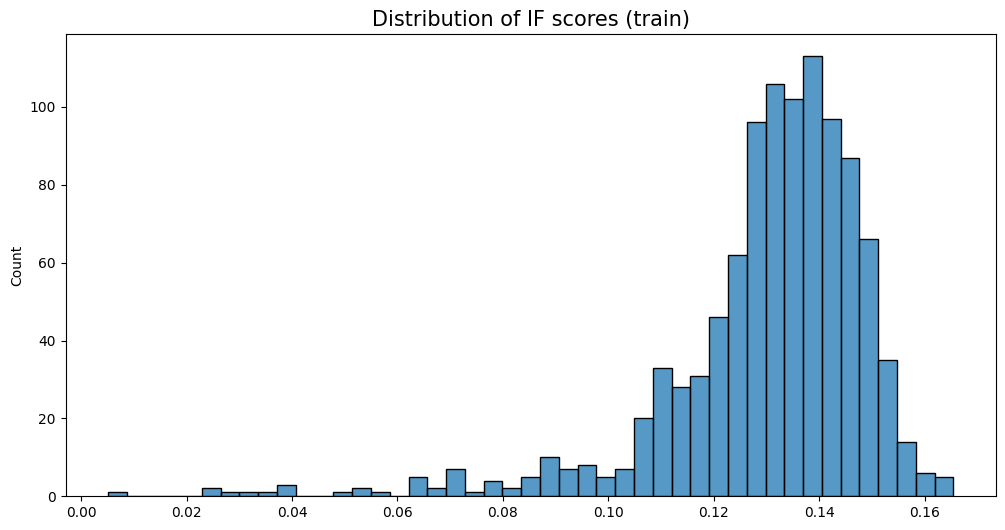

In [69]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_tr))
plt.title('Distribution of IF scores (train)', fontsize = 15)
plt.show()

In [70]:
# set the thresholds

# threshold: mean +(-) 3*std
thres1 = np.mean(np.abs(scores_tr)) - 3*np.std(np.abs(scores_tr))
thres2 = np.mean(np.abs(scores_tr)) + 3*np.std(np.abs(scores_tr))

print("threshold (mean-3*std): ", thres1, "threshold (mean+3*std):", thres2)

threshold (mean-3*std):  0.07092052584277538 threshold (mean+3*std): 0.18933994483221167


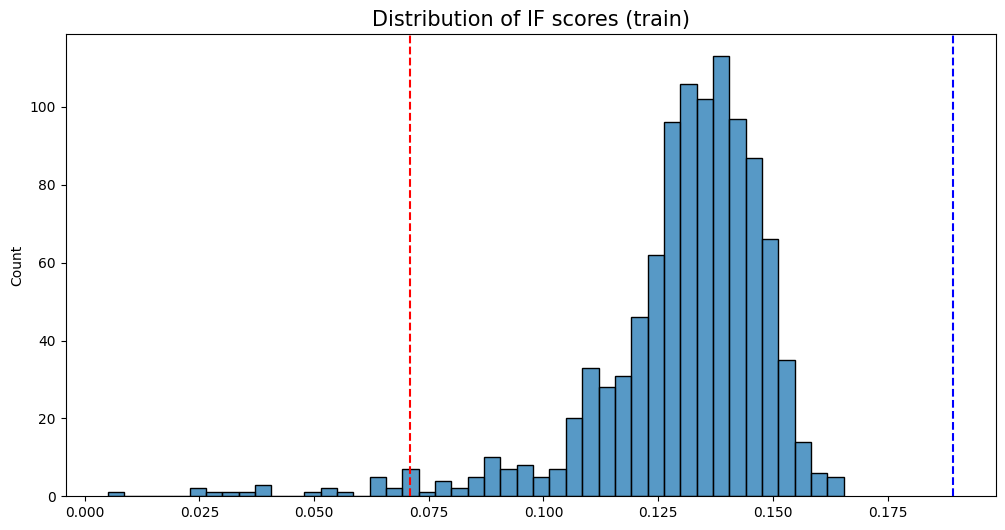

In [71]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_tr))
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of IF scores (train)', fontsize = 15)
plt.show()

In [72]:
# predict lof scores
scores_ts = clf_if.decision_function(x_test)

In [73]:
# make the results to the dataframe
results = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(np.abs(scores_ts))[0]], axis=1)
results.columns = ['Label', 'IF Scores']

results['Pred_thres'] = 0
results.loc[(results['IF Scores'] < thres1)|(results['IF Scores'] > thres2), 'Pred_thres'] = 1

results

,Label,IF Scores,Pred_thres
0,0,0.117840,0
1,0,0.152585,0
2,0,0.143612,0
3,0,0.151495,0
4,0,0.129811,0
...,...,...,...
466,1,0.132505,0
467,0,0.151433,0
468,0,0.131065,0
469,0,0.117720,0


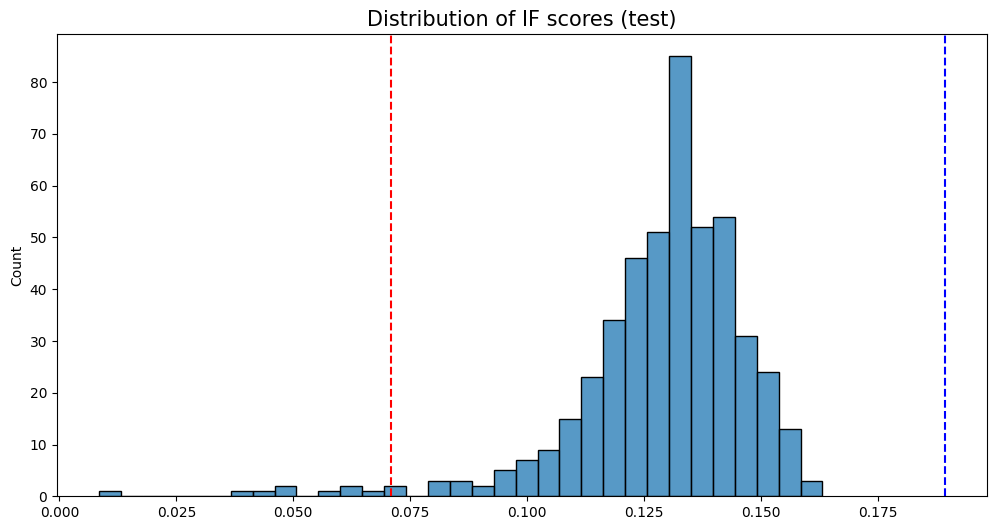

In [74]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.abs(scores_ts))
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of IF scores (test)', fontsize = 15)
plt.show()

In [75]:
results.Label.value_counts()

0    440
1     31
Name: Label, dtype: int64

In [76]:
results.Pred_thres.value_counts()

0    461
1     10
Name: Pred_thres, dtype: int64

In [77]:
print("Classification Report (threshold) :")
print(classification_report(results.Label.values, results.Pred_thres.values))

Classification Report (threshold) :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       440
           1       0.40      0.13      0.20        31

    accuracy                           0.93       471
   macro avg       0.67      0.56      0.58       471
weighted avg       0.91      0.93      0.91       471



#### *(3) SVM algorithm*

In [78]:
'''
OCSVM parameters (https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)
  - kernel: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
  - degree: the degree of the polynomial kernel function
  - gamma: kernel coefficient for rbf/poly/sigmoid function
  - nu: an upper bound on the fraction of training errors and a lower bound of the fraction of support vectors
'''

# define
clf_svm = OneClassSVM(kernel='linear', degree=3, gamma=0.01,nu=0.05,
                                         max_iter=-1)
# train
clf_svm.fit(x_train_normal)

# scoring
scores_tr = clf_svm.score_samples(x_train_normal)

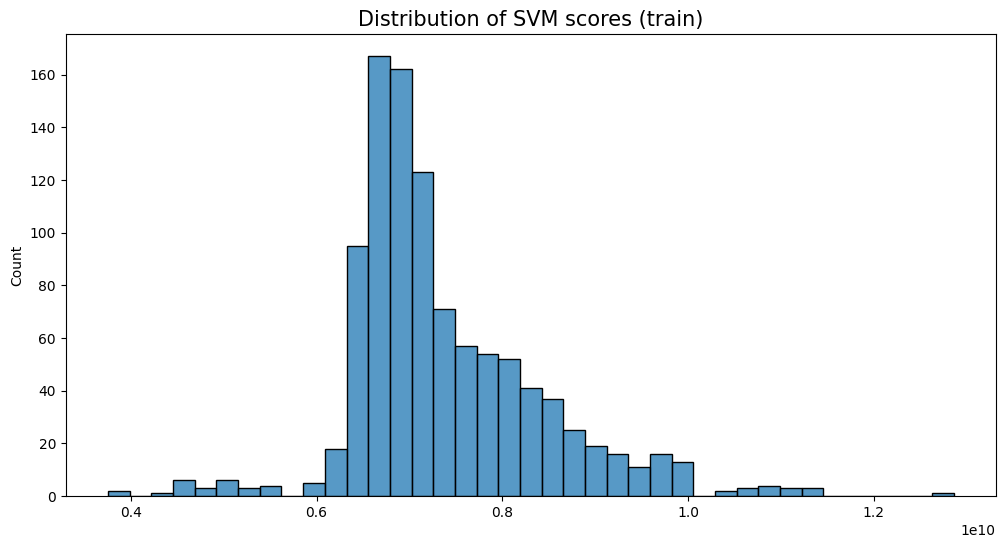

In [79]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_tr)
plt.title('Distribution of SVM scores (train)', fontsize = 15)
plt.show()

In [80]:
# set the thresholds

# case 1. percentile (하위 5% 허용오차)
thres1 = np.percentile(scores_tr, 5)

# case 2. percentile (상위 5% 허용오차)
thres2 = np.percentile(scores_tr, 95)

print("threshold (max): ", thres1, "threshold (percentile):", thres2)

threshold (max):  6332546201.204237 threshold (percentile): 9454121514.66575


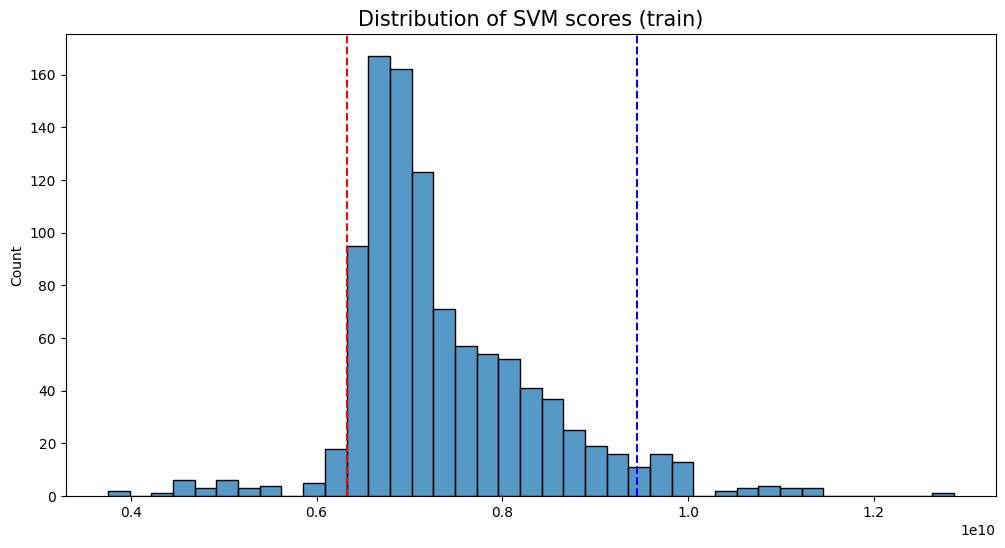

In [81]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_tr)
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of SVM scores (train)', fontsize = 15)
plt.show()

In [82]:
# predict lof scores
scores_ts = clf_svm.score_samples(x_test)

In [83]:
# make the results to the dataframe
results = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(scores_ts)[0]], axis=1)
results.columns = ['Label', 'SVM Scores']

results['Pred_thres'] = 0
results.loc[(results['SVM Scores'] < thres1)|(results['SVM Scores'] > thres2), 'Pred_thres'] = 1

results

,Label,SVM Scores,Pred_thres
0,0,7.045839e+09,0
1,0,7.696498e+09,0
2,0,7.187307e+09,0
3,0,8.883447e+09,0
4,0,8.355615e+09,0
...,...,...,...
466,1,7.518703e+09,0
467,0,7.301942e+09,0
468,0,9.935951e+09,1
469,0,7.867542e+09,0


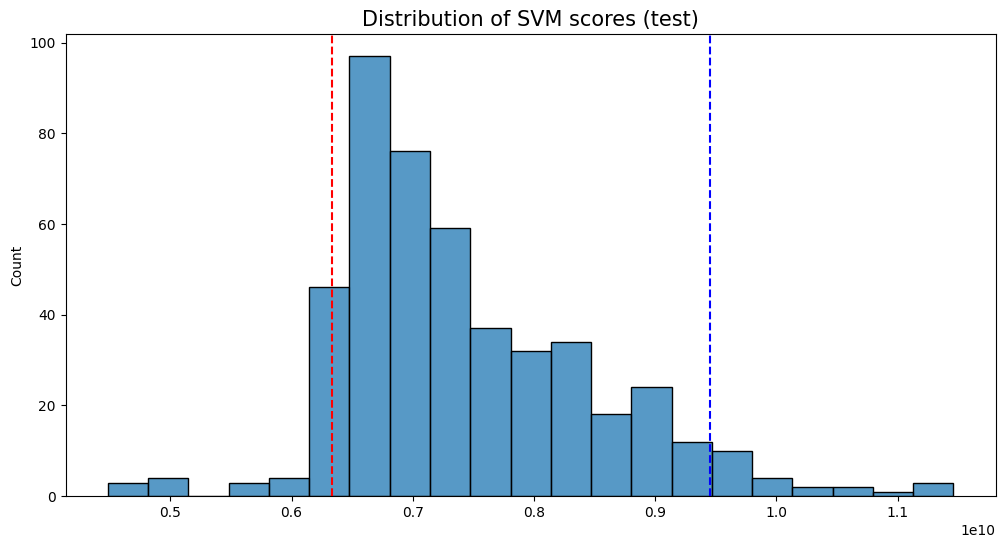

In [84]:
# visualize the distribution
plt.figure(figsize=(12, 6))
sns.histplot(scores_ts)
plt.axvline(thres1, color = "r", linestyle = "--")
plt.axvline(thres2, color = "b", linestyle = "--")
plt.title('Distribution of SVM scores (test)', fontsize = 15)
plt.show()

In [85]:
results.Label.value_counts()

0    440
1     31
Name: Label, dtype: int64

In [86]:
results.Pred_thres.value_counts()

0    422
1     49
Name: Pred_thres, dtype: int64

In [87]:
print("Classification Report (threshold) :")
print(classification_report(results.Label.values, results.Pred_thres.values))

Classification Report (threshold) :
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       440
           1       0.06      0.10      0.07        31

    accuracy                           0.84       471
   macro avg       0.50      0.50      0.49       471
weighted avg       0.88      0.84      0.86       471

